In [ ]:
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Calculate Vader

In [ ]:
df = pd.read_csv("/content/out.login.csv", index_col=0)

df["sort"] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df = df[df['sort'] >= '2017-09-01 00:00:00']
df =  df[df['sort'] < '2022-01-01 00:00:00']

df = df.rename(columns={"created_at": "timestamp"})
df=df.sort_values(by="sort")
df.drop(["sort"],axis=1,inplace=True)
df

,timestamp,full_text
id,,
7621,2021-01-31 21:15:43,It is taking a lot of effort to convince the w...
97,2021-01-31 22:18:42,@RD_btc @BotcoinH Followed
82,2021-01-31 22:18:47,@sthenc Just imagine buying silver and not #BTC 🤪
68,2021-01-31 22:23:39,@AltcoinPsycho That’s exactly what everyone wa...
25,2021-01-31 22:35:45,@mcuban Well done and welcome aboard. The pic...
...,...,...
2535,2021-12-31 23:55:11,Overall crypto will be much healthier if Bitco...
2582,2021-12-31 23:56:30,@TechDev_52 @PeterSchiff Btc has become an add...
2598,2021-12-31 23:57:18,@zhusu @jack i like bitcoin but i cant wait fo...


In [ ]:
dirty = [u'\x85', u'\xa0', u'\u1680', u'\u180e', u'\u2000-', u'\u200a',
                   u'\u2028', u'\u2029', u'\u202f', u'\u205f', u'\u3000', u'\xA0', u'\u180E',
                   u'\u200A', u'\u202F', u'\u205F', "\n", "\r"]

for d in dirty:
    df["full_text"]= df['full_text'].str.replace(d," ")
    
df["full_text"] = df["full_text"].str.replace("@[A-Za-z0-9_]+","")
df["full_text"] = df["full_text"].str.replace(r"http\S+", "")
df["full_text"] = df["full_text"].str.replace("#","")
df["full_text"] = df["full_text"].str.replace("\s+"," ")

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


,timestamp,full_text
id,,
7621,2021-01-31 21:15:43,It is taking a lot of effort to convince the w...
97,2021-01-31 22:18:42,Followed
82,2021-01-31 22:18:47,Just imagine buying silver and not BTC 🤪
68,2021-01-31 22:23:39,That’s exactly what everyone was saying in Ju...
25,2021-01-31 22:35:45,Well done and welcome aboard. The pic has now...
...,...,...
2535,2021-12-31 23:55:11,Overall crypto will be much healthier if Bitco...
2582,2021-12-31 23:56:30,Btc has become an addiction for the people th...
2598,2021-12-31 23:57:18,i like bitcoin but i cant wait for the day wh...


In [ ]:
df["full_text"]= df["full_text"].str.strip()
df = df[df["full_text"] != ""]
df

,timestamp,full_text
id,,
7621,2021-01-31 21:15:43,It is taking a lot of effort to convince the w...
97,2021-01-31 22:18:42,Followed
82,2021-01-31 22:18:47,Just imagine buying silver and not BTC 🤪
68,2021-01-31 22:23:39,That’s exactly what everyone was saying in Jul...
25,2021-01-31 22:35:45,Well done and welcome aboard. The pic has now ...
...,...,...
2535,2021-12-31 23:55:11,Overall crypto will be much healthier if Bitco...
2582,2021-12-31 23:56:30,Btc has become an addiction for the people tha...
2598,2021-12-31 23:57:18,i like bitcoin but i cant wait for the day whe...


In [ ]:
sia = SentimentIntensityAnalyzer()
c = 0
def analyzer(df):
  global c
  if c%10000 == 0:
    print(c)
  c += 1
  vader = sia.polarity_scores(df["full_text"])
  scoreList = [vader["pos"], vader["neg"], vader["neu"], vader["compound"]]

  return scoreList

In [ ]:
df["scoreList"] = df.apply(analyzer, axis=1)

0
10000
20000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
scoreList = pd.DataFrame(df['scoreList'].tolist(), columns=['vader_pos', 'vader_neg', 'vader_neu', 'vader_compound'])

In [ ]:
df = pd.concat([df, scoreList], axis=1)
df.drop(["scoreList"],axis=1,inplace=True)
df.dtypes

In [ ]:
df["1day_time_start"] = df['timestamp'].str[:-9]
# df["1h_time_start"] = df['timestamp'].str[:-6]
df["30min_time_start"] = df['timestamp'].str[:-3]
df["15min_time_start"] = df['timestamp'].str[:-3]
# df["10min_time_start"] = df['timestamp'].str[:-3]
# df["5min_time_start"] = df['timestamp'].str[:-3]
# df["1min_time_start"] = df['timestamp'].str[:-3]


In [ ]:

df_1day = df[["vader_pos", "vader_neg", "vader_neu", "vader_compound", "1day_time_start"]]
# df_1h = df[["vader_pos", "vader_neg", "vader_neu", "vader_compound", "1h_time_start"]]
df_30min = df[["vader_pos", "vader_neg", "vader_neu", "vader_compound", "30min_time_start"]]
df_15min = df[["vader_pos", "vader_neg", "vader_neu", "vader_compound", "15min_time_start"]]
# df_10min = df[["vader_pos", "vader_neg", "vader_neu", "vader_compound", "10min_time_start"]]
# df_5min = df[["vader_pos", "vader_neg", "vader_neu", "vader_compound", "5min_time_start"]]
# df_1min = df[["vader_pos", "vader_neg", "vader_neu", "vader_compound", "1min_time_start"]]


# df_1h["timestamp"] = df_1h["1h_time_start"]
# df_1h.drop(["1h_time_start"],axis=1,inplace=True)

# daily
df_1day["timestamp"] =  pd.to_datetime(df['timestamp'], format="%Y-%m-%d").dt.date

# 30min
def split_30_min(timestamp):
    minPart = int(timestamp[-2:])
    if minPart < 30:
        return timestamp[:-2]+"00"
    else:
        return timestamp[:-2]+"30"
    
df_30min["timestamp"] = df_30min["30min_time_start"].apply(split_30_min)
df_30min.drop(["30min_time_start"],axis=1,inplace=True)


def split_15_min(timestamp):
    minPart = int(timestamp[-2:])
    if minPart < 15:
        return timestamp[:-2]+"00"
    elif minPart >= 15 and minPart < 30:
        return timestamp[:-2]+"15"
    elif minPart >= 30 and minPart < 45:
        return timestamp[:-2]+"30"
    else:
        return timestamp[:-2]+"45"

df_15min["timestamp"] = df_15min["15min_time_start"].apply(split_15_min)
df_15min.drop(["15min_time_start"],axis=1,inplace=True)

def split_10_min(timestamp):
    minPart = int(timestamp[-2:])
    if minPart < 10:
        return timestamp[:-2]+"00"
    elif minPart >= 10 and minPart < 20:
        return timestamp[:-2]+"10"
    elif minPart >= 20 and minPart < 30:
        return timestamp[:-2]+"20"
    elif minPart >= 30 and minPart < 40:
        return timestamp[:-2]+"30"
    elif minPart >= 40 and minPart < 50:
        return timestamp[:-2]+"40"
    else:
        return timestamp[:-2]+"50"
    
# df_10min["timestamp"] = df_10min["10min_time_start"].apply(split_10_min)
# df_10min.drop(["10min_time_start"],axis=1,inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
def split_5_min(timestamp):
    minPart = int(timestamp[-2:])
    if minPart < 5:
        return timestamp[:-2]+"00"
    elif minPart >= 5 and minPart < 10:
        return timestamp[:-2]+"05"
    elif minPart >= 10 and minPart < 15:
        return timestamp[:-2]+"10"
    elif minPart >= 15 and minPart < 20:
        return timestamp[:-2]+"15"
    elif minPart >= 20 and minPart < 25:
        return timestamp[:-2]+"20"
    elif minPart >= 25 and minPart < 30:
        return timestamp[:-2]+"25"
    elif minPart >= 30 and minPart < 35:
        return timestamp[:-2]+"30"
    elif minPart >= 35 and minPart < 40:
        return timestamp[:-2]+"35"
    elif minPart >= 40 and minPart < 45:
        return timestamp[:-2]+"40"
    elif minPart >= 45 and minPart < 50:
        return timestamp[:-2]+"45"
    elif minPart >= 50 and minPart < 55:
        return timestamp[:-2]+"50"
    else:
        return timestamp[:-2]+"55"
    
# df_5min["timestamp"] = df_5min["5min_time_start"].apply(split_5_min)
# df_5min.drop(["5min_time_start"],axis=1,inplace=True)

In [ ]:
df_30min["timestamp"] = pd.to_datetime(df_30min['timestamp'], format='%Y-%m-%d %H:%M')
df_30min = df_30min.sort_values(by='timestamp')
df_30min

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,vader_pos,vader_neg,vader_neu,vader_compound,timestamp
0,0.067,0.000,0.933,0.2500,2021-01-31 21:00:00
1,0.000,0.000,1.000,0.0000,2021-01-31 22:00:00
2,0.000,0.000,1.000,0.0000,2021-01-31 22:00:00
3,0.000,0.128,0.872,-0.4215,2021-01-31 22:00:00
15,0.448,0.000,0.552,0.5007,2021-01-31 22:30:00
...,...,...,...,...,...
28826,0.082,0.000,0.918,0.3612,2021-12-31 23:30:00
28827,0.310,0.282,0.408,0.4019,2021-12-31 23:30:00
28828,0.054,0.203,0.743,-0.7806,2021-12-31 23:30:00
28830,0.348,0.039,0.613,0.9274,2021-12-31 23:30:00


In [ ]:
df_15min["timestamp"] = pd.to_datetime(df_15min['timestamp'], format='%Y-%m-%d %H:%M')
df_15min = df_15min.sort_values(by='timestamp')
df_15min

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,vader_pos,vader_neg,vader_neu,vader_compound,timestamp
0,0.067,0.000,0.933,0.2500,2021-01-31 21:15:00
1,0.000,0.000,1.000,0.0000,2021-01-31 22:15:00
2,0.000,0.000,1.000,0.0000,2021-01-31 22:15:00
3,0.000,0.128,0.872,-0.4215,2021-01-31 22:15:00
4,0.228,0.000,0.772,0.6369,2021-01-31 22:30:00
...,...,...,...,...,...
28840,0.000,0.298,0.702,-0.1779,2021-12-31 23:45:00
28839,0.000,0.239,0.761,-0.2960,2021-12-31 23:45:00
28838,0.000,0.167,0.833,-0.2023,2021-12-31 23:45:00
28843,0.048,0.185,0.767,-0.7672,2021-12-31 23:45:00


In [ ]:
# df_10min["timestamp"] = pd.to_datetime(df_10min['timestamp'], format='%Y-%m-%d %H:%M')
# df_10min = df_10min.sort_values(by='timestamp')
# df_10min.drop(["10min_time_start"],axis=1,inplace=True)

In [ ]:
# df_5min["timestamp"] = pd.to_datetime(df_5min['timestamp'], format='%Y-%m-%d %H:%M')
# df_5min = df_5min.sort_values(by='timestamp')
# df_5min

In [ ]:

def count(df):

  if df["vader_compound"] > 0.05:
    df["pos_count"] = 1

  elif df["vader_compound"] < -0.05:
    df["neg_count"] = 1

  else:

    df["neu_count"] = 1
  return df

In [ ]:
c = [0]*len(df_1day)
df_1day2 = df_1day[["timestamp", "vader_compound"]]
df_1day2["pos_count"] = c
df_1day2["neg_count"] = c
df_1day2["neu_count"] = c
df_1day2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,timestamp,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31,0.2500,0,0,0
1,2021-01-31,0.0000,0,0,0
2,2021-01-31,0.0000,0,0,0
3,2021-01-31,-0.4215,0,0,0
4,2021-01-31,0.6369,0,0,0
...,...,...,...,...,...
28846,2021-12-31,-0.8126,0,0,0
28847,2021-12-31,0.0000,0,0,0
28848,2021-12-31,0.1901,0,0,0
28849,2021-12-31,0.0000,0,0,0


In [ ]:
c = [0]*len(df_30min)
df_30min2 = df_30min[["timestamp", "vader_compound"]]
df_30min2["pos_count"] = c
df_30min2["neg_count"] = c
df_30min2["neu_count"] = c
df_30min2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,timestamp,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31 21:00:00,0.2500,0,0,0
1,2021-01-31 22:00:00,0.0000,0,0,0
2,2021-01-31 22:00:00,0.0000,0,0,0
3,2021-01-31 22:00:00,-0.4215,0,0,0
15,2021-01-31 22:30:00,0.5007,0,0,0
...,...,...,...,...,...
28826,2021-12-31 23:30:00,0.3612,0,0,0
28827,2021-12-31 23:30:00,0.4019,0,0,0
28828,2021-12-31 23:30:00,-0.7806,0,0,0
28830,2021-12-31 23:30:00,0.9274,0,0,0


In [ ]:
c = [0]*len(df_15min)
df_15min2 = df_15min[["timestamp", "vader_compound"]]
df_15min2["pos_count"] = c
df_15min2["neg_count"] = c
df_15min2["neu_count"] = c
df_15min2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,timestamp,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31 21:15:00,0.2500,0,0,0
1,2021-01-31 22:15:00,0.0000,0,0,0
2,2021-01-31 22:15:00,0.0000,0,0,0
3,2021-01-31 22:15:00,-0.4215,0,0,0
4,2021-01-31 22:30:00,0.6369,0,0,0
...,...,...,...,...,...
28840,2021-12-31 23:45:00,-0.1779,0,0,0
28839,2021-12-31 23:45:00,-0.2960,0,0,0
28838,2021-12-31 23:45:00,-0.2023,0,0,0
28843,2021-12-31 23:45:00,-0.7672,0,0,0


In [ ]:
# c = [0]*len(df_10min)
# df_10min2 = df_10min[["timestamp", "vader_compound"]]
# df_10min2["pos_count"] = c
# df_10min2["neg_count"] = c
# df_10min2["neu_count"] = c
# df_10min2 

In [ ]:
# df_1min["timestamp"] = df_1min["1min_time_start"]+":00"
# df_1min.drop(["1min_time_start"],axis=1,inplace=True)
# df_1min["timestamp"] = pd.to_datetime(df_1min['timestamp'], format='%Y-%m-%d %H:%M')

In [ ]:
# c = [0]*len(df_5min)
# df_5min2 = df_5min[["timestamp", "vader_compound"]]
# df_5min2["pos_count"] = c
# df_5min2["neg_count"] = c
# df_5min2["neu_count"] = c
# df_5min2 

In [ ]:
# c = [0]*len(df_1min)
# df_1min2 = df_1min[["timestamp", "vader_compound"]]
# df_1min2["pos_count"] = c
# df_1min2["neg_count"] = c
# df_1min2["neu_count"] = c
# df_1min2 

In [ ]:
# df_1h["timestamp"] = df_1h["1h_time_start"]+":00:00"
# df_1h.drop(["1h_time_start"],axis=1,inplace=True)
# df_1h["timestamp"] = pd.to_datetime(df_1h['timestamp'], format='%Y-%m-%d %H:%M')
# df_1h


In [ ]:
# c = [0]*len(df_1h)
# df_1h2 = df_1h[["timestamp", "vader_compound"]]
# df_1h2["pos_count"] = c
# df_1h2["neg_count"] = c
# df_1h2["neu_count"] = c
# df_1h2 

In [ ]:
# df_1h2 = df_1h2.apply(count, axis=1)
# df_1h2 = df_1h2.groupby('timestamp', as_index=False, sort=False).sum()
# df_1h2 = df_1h2.sort_values(by='timestamp')
# df_1h2 = df_1h2.drop(['vader_compound'], axis=1)
# df_1h2

In [ ]:
df_1day2 = df_1day2.apply(count, axis=1)
df_1day2 = df_1day2.groupby('timestamp', as_index=False, sort=False).sum()
df_1day2 = df_1day2.sort_values(by='timestamp')
df_1day2 = df_1day2.drop(['vader_compound'], axis=1)
df_1day2

,timestamp,pos_count,neg_count,neu_count
0,2021-01-31,48,23,22
1,2021-02-01,44,18,22
2,2021-02-02,48,21,19
3,2021-02-03,39,16,28
4,2021-02-04,49,21,22
...,...,...,...,...
330,2021-12-27,41,18,22
331,2021-12-28,44,18,16
332,2021-12-29,45,24,14
333,2021-12-30,35,24,21


In [ ]:
df_30min2 = df_30min2.apply(count, axis=1)
df_30min2 = df_30min2.groupby('timestamp', as_index=False, sort=False).sum()
df_30min2 = df_30min2.sort_values(by='timestamp')
df_30min2 = df_30min2.drop(['vader_compound'], axis=1)
df_30min2

,timestamp,pos_count,neg_count,neu_count
0,2021-01-31 21:00:00,1,0,0
1,2021-01-31 22:00:00,0,1,2
2,2021-01-31 22:30:00,7,1,4
3,2021-01-31 23:00:00,12,4,10
4,2021-01-31 23:30:00,28,17,6
...,...,...,...,...
1346,2021-12-30 23:00:00,7,3,5
1347,2021-12-30 23:30:00,28,21,15
1348,2021-12-31 22:30:00,10,3,1
1349,2021-12-31 23:00:00,14,5,7


In [ ]:
df_15min2 = df_15min2.apply(count, axis=1)
df_15min2 = df_15min2.groupby('timestamp', as_index=False, sort=False).sum()
df_15min2 = df_15min2.sort_values(by='timestamp')
df_15min2 = df_15min2.drop(['vader_compound'], axis=1)
df_15min2

,timestamp,pos_count,neg_count,neu_count
0,2021-01-31 21:15:00,1,0,0
1,2021-01-31 22:15:00,0,1,2
2,2021-01-31 22:30:00,2,0,1
3,2021-01-31 22:45:00,5,1,3
4,2021-01-31 23:00:00,3,2,4
...,...,...,...,...
2235,2021-12-31 22:45:00,7,1,1
2236,2021-12-31 23:00:00,5,3,4
2237,2021-12-31 23:15:00,9,2,3
2238,2021-12-31 23:30:00,14,7,5


In [ ]:
# df_10min2 = df_10min2.apply(count, axis=1)
# df_10min2 = df_10min2.groupby('timestamp', as_index=False, sort=False).sum()
# df_10min2 = df_10min2.sort_values(by='timestamp')
# df_10min2 = df_10min2.drop(['vader_compound'], axis=1)
# df_10min2

In [ ]:
# df_5min2 = df_5min2.apply(count, axis=1)
# df_5min2 = df_5min2.groupby('timestamp', as_index=False, sort=False).sum()
# df_5min2 = df_5min2.sort_values(by='timestamp')
# df_5min2 = df_5min2.drop(['vader_compound'], axis=1)
# df_5min2

,timestamp,pos_count,neg_count,neu_count
0,2017-09-01 13:00:00,0,0,1
1,2017-09-01 14:40:00,1,0,0
2,2017-09-01 17:50:00,1,0,0
3,2017-09-01 21:05:00,0,1,0
4,2017-09-01 21:35:00,1,0,0
...,...,...,...,...
30957,2021-01-30 23:35:00,7,1,1
30958,2021-01-30 23:40:00,4,2,7
30959,2021-01-30 23:45:00,9,2,5
30960,2021-01-30 23:50:00,8,3,2


In [ ]:
# df_1min2 = df_1min2.apply(count, axis=1)
# df_1min2 = df_1min2.groupby('timestamp', as_index=False, sort=False).sum()
# df_1min2 = df_1min2.sort_values(by='timestamp')
# df_1min2 = df_1min2.drop(['vader_compound'], axis=1)
# df_1min2

In [ ]:
df_1day3 = df_1day[["timestamp", 'vader_pos', 'vader_neg', 'vader_neu', 'vader_compound']]
df_1day3 = df_1day3.groupby('timestamp', as_index=False, sort=False).mean()
df_1day3 = df_1day3.sort_values(by='timestamp')
df_1day3

,timestamp,vader_pos,vader_neg,vader_neu,vader_compound
0,2021-01-31,0.120194,0.049699,0.830054,0.186323
1,2021-02-01,0.105964,0.042524,0.851500,0.182087
2,2021-02-02,0.120750,0.045216,0.834023,0.205808
3,2021-02-03,0.125217,0.052193,0.822578,0.134387
4,2021-02-04,0.105424,0.049250,0.845315,0.220521
...,...,...,...,...,...
330,2021-12-27,0.121148,0.061407,0.817457,0.152890
331,2021-12-28,0.112244,0.067385,0.820410,0.179797
332,2021-12-29,0.122795,0.074530,0.802663,0.171357
333,2021-12-30,0.121125,0.067950,0.810937,0.140750


In [ ]:
# df_1h3 = df_1h[["timestamp", 'vader_pos', 'vader_neg', 'vader_neu', 'vader_compound']]
# df_1h3 = df_1h3.groupby('timestamp', as_index=False, sort=False).mean()
# df_1h3 = df_1h3.sort_values(by='timestamp')
# df_1h3

In [ ]:
df_30min3 = df_30min[["timestamp", 'vader_pos', 'vader_neg', 'vader_neu', 'vader_compound']]
df_30min3 = df_30min3.groupby('timestamp', as_index=False, sort=False).mean()
df_30min3 = df_30min3.sort_values(by='timestamp')
df_30min3

,timestamp,vader_pos,vader_neg,vader_neu,vader_compound
0,2021-01-31 21:00:00,0.067000,0.000000,0.933000,0.250000
1,2021-01-31 22:00:00,0.000000,0.042667,0.957333,-0.140500
2,2021-01-31 22:30:00,0.133583,0.013333,0.853083,0.311025
3,2021-01-31 23:00:00,0.119885,0.036385,0.843654,0.232619
4,2021-01-31 23:30:00,0.125314,0.066431,0.808196,0.151355
...,...,...,...,...,...
1346,2021-12-30 23:00:00,0.123333,0.044067,0.832467,0.279620
1347,2021-12-30 23:30:00,0.122500,0.074609,0.802937,0.110402
1348,2021-12-31 22:30:00,0.160286,0.061929,0.777714,0.193550
1349,2021-12-31 23:00:00,0.120269,0.055615,0.824077,0.201188


In [ ]:
df_15min3 = df_15min[["timestamp", 'vader_pos', 'vader_neg', 'vader_neu', 'vader_compound']]
df_15min3 = df_15min3.groupby('timestamp', as_index=False, sort=False).mean()
df_15min3 = df_15min3.sort_values(by='timestamp')
df_15min3

,timestamp,vader_pos,vader_neg,vader_neu,vader_compound
0,2021-01-31 21:15:00,0.067000,0.000000,0.933000,0.250000
1,2021-01-31 22:15:00,0.000000,0.042667,0.957333,-0.140500
2,2021-01-31 22:30:00,0.196667,0.000000,0.803333,0.482633
3,2021-01-31 22:45:00,0.112556,0.017778,0.869667,0.253822
4,2021-01-31 23:00:00,0.116222,0.056222,0.827333,0.108911
...,...,...,...,...,...
2235,2021-12-31 22:45:00,0.131889,0.058778,0.809222,0.176556
2236,2021-12-31 23:00:00,0.065583,0.086917,0.847417,0.081383
2237,2021-12-31 23:15:00,0.167143,0.028786,0.804071,0.303879
2238,2021-12-31 23:30:00,0.115462,0.081423,0.803154,0.138327


In [ ]:
# df_10min3 = df_10min[["timestamp", 'vader_pos', 'vader_neg', 'vader_neu', 'vader_compound']]
# df_10min3 = df_10min3.groupby('timestamp', as_index=False, sort=False).mean()
# df_10min3 = df_10min3.sort_values(by='timestamp')
# df_10min3

In [ ]:
# df_5min3 = df_5min[["timestamp", 'vader_pos', 'vader_neg', 'vader_neu', 'vader_compound']]
# df_5min3 = df_5min3.groupby('timestamp', as_index=False, sort=False).mean()
# df_5min3 = df_5min3.sort_values(by='timestamp')
# df_5min3

In [ ]:
# df_1min3 = df_1min[["timestamp", 'vader_pos', 'vader_neg', 'vader_neu', 'vader_compound']]
# df_1min3 = df_1min3.groupby('timestamp', as_index=False, sort=False).mean()
# df_1min3 = df_1min3.sort_values(by='timestamp')
# df_1min3

In [ ]:
df_1day = pd.merge(df_1day3, df_1day2, how='left', on = 'timestamp')
df_1day

,timestamp,vader_pos,vader_neg,vader_neu,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31,0.120194,0.049699,0.830054,0.186323,48,23,22
1,2021-02-01,0.105964,0.042524,0.851500,0.182087,44,18,22
2,2021-02-02,0.120750,0.045216,0.834023,0.205808,48,21,19
3,2021-02-03,0.125217,0.052193,0.822578,0.134387,39,16,28
4,2021-02-04,0.105424,0.049250,0.845315,0.220521,49,21,22
...,...,...,...,...,...,...,...,...
330,2021-12-27,0.121148,0.061407,0.817457,0.152890,41,18,22
331,2021-12-28,0.112244,0.067385,0.820410,0.179797,44,18,16
332,2021-12-29,0.122795,0.074530,0.802663,0.171357,45,24,14
333,2021-12-30,0.121125,0.067950,0.810937,0.140750,35,24,21


In [ ]:
# df_1h = pd.merge(df_1h3, df_1h2, how='left', on = 'timestamp')
# df_1h

In [ ]:
df_30min = pd.merge(df_30min3, df_30min2, how='left', on = 'timestamp')
df_30min

,timestamp,vader_pos,vader_neg,vader_neu,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31 21:00:00,0.067000,0.000000,0.933000,0.250000,1,0,0
1,2021-01-31 22:00:00,0.000000,0.042667,0.957333,-0.140500,0,1,2
2,2021-01-31 22:30:00,0.133583,0.013333,0.853083,0.311025,7,1,4
3,2021-01-31 23:00:00,0.119885,0.036385,0.843654,0.232619,12,4,10
4,2021-01-31 23:30:00,0.125314,0.066431,0.808196,0.151355,28,17,6
...,...,...,...,...,...,...,...,...
1346,2021-12-30 23:00:00,0.123333,0.044067,0.832467,0.279620,7,3,5
1347,2021-12-30 23:30:00,0.122500,0.074609,0.802937,0.110402,28,21,15
1348,2021-12-31 22:30:00,0.160286,0.061929,0.777714,0.193550,10,3,1
1349,2021-12-31 23:00:00,0.120269,0.055615,0.824077,0.201188,14,5,7


In [ ]:
df_15min = pd.merge(df_15min3, df_15min2, how='left', on = 'timestamp')
df_15min

In [ ]:
# df_10min = pd.merge(df_10min3, df_10min2, how='left', on = 'timestamp')
# df_10min

In [ ]:
# df_5min = pd.merge(df_5min3, df_5min2, how='left', on = 'timestamp')
# df_5min

In [ ]:
# df_1min = pd.merge(df_1min3, df_1min2, how='left', on = 'timestamp')
# df_1min

In [ ]:
# df_1h.to_csv("1hTweet.csv")

# Join sentimental dataset with Bitcoin OHLCV price dataset

In [ ]:
df_1day.to_csv("1dayTweet.csv", index=False)

In [ ]:
df_30min.to_csv("30minTweet.csv", index=False)

In [ ]:
df_15min.to_csv("15minTweet.csv",index=False)

In [ ]:
btc_1day = pd.read_csv("/content/1DAY.csv")
btc_1day['timestamp'] = pd.to_datetime(btc_1day['timestamp'])
btc_1day_A = btc_1day[btc_1day['timestamp'] < '2021-01-31 00:00:00']
btc_1day_B = btc_1day[btc_1day['timestamp'] >= '2021-01-31 00:00:00'].drop(['vader_pos', 'vader_neg',	'vader_neu',	'vader_compound',	'pos_count',	'neg_count',	'neu_count'], axis=1)

btc_30min = pd.read_csv("/content/30MIN.csv")
btc_30min['timestamp'] = pd.to_datetime(btc_30min['timestamp'])
btc_30min_A = btc_30min[btc_30min['timestamp'] < '2021-01-31 00:00:00']
btc_30min_B = btc_30min[btc_30min['timestamp'] >= '2021-01-31 00:00:00'].drop(['vader_pos', 'vader_neg',	'vader_neu',	'vader_compound',	'pos_count',	'neg_count',	'neu_count'], axis=1)

btc_15min = pd.read_csv("/content/15MIN.csv")
btc_15min['timestamp'] = pd.to_datetime(btc_15min['timestamp'])
btc_15min_A = btc_15min[btc_15min['timestamp'] < '2021-01-31 00:00:00']
btc_15min_B = btc_15min[btc_15min['timestamp'] >= '2021-01-31 00:00:00'].drop(['vader_pos', 'vader_neg',	'vader_neu',	'vader_compound',	'pos_count',	'neg_count',	'neu_count'], axis=1)


In [ ]:
df_1day["timestamp"] = pd.to_datetime(df_1day["timestamp"])
df_30min["timestamp"] = pd.to_datetime(df_30min["timestamp"])
df_15min["timestamp"] = pd.to_datetime(df_15min["timestamp"])

dfFinal_1day = pd.merge(btc_1day_B, df_1day, how='left', on = 'timestamp')
dfFinal_30min = pd.merge(btc_30min_B, df_30min, how='left', on = 'timestamp')
dfFinal_15min = pd.merge(btc_15min_B, df_15min, how='left', on = 'timestamp')

In [ ]:
dfFinal_1day = dfFinal_1day.sort_values(by='timestamp')
dfFinal_1day['vader_pos'] = dfFinal_1day['vader_pos'].fillna(0)
dfFinal_1day['vader_neg'] = dfFinal_1day['vader_neg'].fillna(0)
dfFinal_1day['vader_neu'] = dfFinal_1day['vader_neu'].fillna(1)
dfFinal_1day['vader_compound'] = dfFinal_1day['vader_compound'].fillna(0)
dfFinal_1day['pos_count'] = dfFinal_1day['pos_count'].fillna(0)
dfFinal_1day['neg_count'] = dfFinal_1day['neg_count'].fillna(0)
dfFinal_1day['neu_count'] = dfFinal_1day['neu_count'].fillna(0)
dfFinal_1day

,timestamp,price_open,price_high,price_low,price_close,volume_traded,MACD,SMA,OBV,RSI,MFI,vader_pos,vader_neg,vader_neu,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31,34300.19,34380.21,32193.70,33141.38,4750.123156,-2048.164822,33124.702,-4750.123156,45.343273,4.067340,0.120194,0.049699,0.830054,0.186323,48,23,22
1,2021-02-01,33110.32,34736.10,32333.01,33532.74,8374.056620,-1860.630402,33746.326,3623.933464,44.900953,0.000000,0.105964,0.042524,0.851500,0.182087,44,18,22
2,2021-02-02,33497.16,36008.67,33431.67,35522.16,7225.865020,-1701.930231,34153.784,10849.798480,49.578185,0.000000,0.120750,0.045216,0.834023,0.205808,48,21,19
3,2021-02-03,35496.91,37732.87,35382.45,37691.63,8777.332877,-1528.867097,34842.182,19627.131360,53.705914,58.593935,0.125217,0.052193,0.822578,0.134387,39,16,28
4,2021-02-04,37693.00,38748.52,36197.65,36996.32,11762.702350,-1584.333422,35376.846,7864.429012,53.513766,78.152773,0.105424,0.049250,0.845315,0.220521,49,21,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2021-12-27,50885.32,52098.60,50479.44,50718.11,1102.559307,-489.717695,50728.604,-33731.842140,48.316689,63.543348,0.121148,0.061407,0.817457,0.152890,41,18,22
331,2021-12-28,50708.05,50719.59,47300.00,47543.30,2210.721843,-742.978892,50067.264,-35942.563980,45.803309,46.486057,0.112244,0.067385,0.820410,0.179797,44,18,16
332,2021-12-29,47597.70,48157.41,46099.94,46483.36,2089.243028,-827.532510,49195.640,-38031.807010,46.250136,55.796910,0.122795,0.074530,0.802663,0.171357,45,24,14
333,2021-12-30,46474.59,47916.32,45934.37,47150.71,2162.270443,-774.296613,48537.338,-35869.536560,45.455607,90.666055,0.121125,0.067950,0.810937,0.140750,35,24,21


In [ ]:
dfFinal_30min = dfFinal_30min.sort_values(by='timestamp')
dfFinal_30min['vader_pos'] = dfFinal_30min['vader_pos'].fillna(0)
dfFinal_30min['vader_neg'] = dfFinal_30min['vader_neg'].fillna(0)
dfFinal_30min['vader_neu'] = dfFinal_30min['vader_neu'].fillna(1)
dfFinal_30min['vader_compound'] = dfFinal_30min['vader_compound'].fillna(0)
dfFinal_30min['pos_count'] = dfFinal_30min['pos_count'].fillna(0)
dfFinal_30min['neg_count'] = dfFinal_30min['neg_count'].fillna(0)
dfFinal_30min['neu_count'] = dfFinal_30min['neu_count'].fillna(0)
dfFinal_30min

,timestamp,price_open,price_high,price_low,price_close,volume_traded,MACD,SMA,OBV,RSI,MFI,vader_pos,vader_neg,vader_neu,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31 00:00:00,34300.19,34380.21,34099.91,34151.77,90.930492,165.050420,34398.738,-90.930492,53.725203,90.919602,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
1,2021-01-31 00:30:00,34145.17,34195.26,33872.26,34104.89,153.340767,133.884940,34301.416,-244.271259,54.074096,60.256556,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
2,2021-01-31 01:00:00,34113.61,34250.71,33997.33,34134.91,62.947545,136.279698,34215.468,-181.323713,53.065983,51.254172,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
3,2021-01-31 01:30:00,34148.68,34300.68,33967.56,34238.58,48.064093,144.549669,34190.630,-133.259621,54.103397,68.929330,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
4,2021-01-31 02:00:00,34234.95,34283.28,33818.54,33934.12,60.745942,120.262262,34112.854,-194.005563,47.417999,51.041370,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,2021-12-31 21:30:00,46099.94,46516.01,46099.94,46329.19,36.690059,1109.042775,46007.938,4485.442273,41.863267,1.062679,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
16076,2021-12-31 22:00:00,46342.34,46560.81,46305.88,46421.59,18.905719,1116.413715,46151.646,4504.347992,41.160461,1.092774,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
16077,2021-12-31 22:30:00,46410.47,46462.67,46254.81,46322.70,36.545366,1108.525054,46206.180,4467.802626,42.111193,0.000000,0.160286,0.061929,0.777714,0.193550,10.0,3.0,1.0
16078,2021-12-31 23:00:00,46322.70,46479.19,46313.24,46345.18,21.113071,1110.318331,46299.938,4488.915697,40.593018,0.000000,0.120269,0.055615,0.824077,0.201188,14.0,5.0,7.0


In [ ]:
dfFinal_15min = dfFinal_15min.sort_values(by='timestamp')
dfFinal_15min['vader_pos'] = dfFinal_15min['vader_pos'].fillna(0)
dfFinal_15min['vader_neg'] = dfFinal_15min['vader_neg'].fillna(0)
dfFinal_15min['vader_neu'] = dfFinal_15min['vader_neu'].fillna(1)
dfFinal_15min['vader_compound'] = dfFinal_15min['vader_compound'].fillna(0)
dfFinal_15min['pos_count'] = dfFinal_15min['pos_count'].fillna(0)
dfFinal_15min['neg_count'] = dfFinal_15min['neg_count'].fillna(0)
dfFinal_15min['neu_count'] = dfFinal_15min['neu_count'].fillna(0)
dfFinal_15min

,timestamp,price_open,price_high,price_low,price_close,volume_traded,MACD,SMA,OBV,RSI,MFI,vader_pos,vader_neg,vader_neu,vader_compound,pos_count,neg_count,neu_count
0,2021-01-31 00:00:00,34300.19,34380.21,34099.91,34226.58,55.794965,74.762863,34338.850,-55.794965,52.496597,86.361599,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
1,2021-01-31 00:15:00,34271.30,34308.26,34121.01,34151.77,35.135527,47.771962,34287.742,-90.930492,51.058770,95.867402,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
2,2021-01-31 00:30:00,34145.17,34195.26,33872.26,33964.78,85.346582,32.855381,34208.144,-176.277074,45.751985,84.651098,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
3,2021-01-31 00:45:00,33998.01,34171.73,33977.70,34104.89,67.994185,44.032247,34154.204,-108.282889,49.237767,64.637172,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
4,2021-01-31 01:00:00,34113.61,34175.57,33997.33,34066.87,29.697119,40.999313,34102.978,-137.980008,49.761460,24.928902,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32155,2021-12-31 22:45:00,46281.00,46462.67,46254.81,46322.70,19.802072,1018.672361,46366.832,-5186.936944,47.329513,25.098484,0.131889,0.058778,0.809222,0.176556,7.0,1.0,1.0
32156,2021-12-31 23:00:00,46322.70,46467.04,46313.24,46437.73,9.423845,1027.848543,46388.540,-5177.513099,47.371106,67.890434,0.065583,0.086917,0.847417,0.081383,5.0,3.0,4.0
32157,2021-12-31 23:15:00,46450.59,46479.19,46345.18,46345.18,11.689226,1020.465637,46365.640,-5189.202326,47.838882,54.377808,0.167143,0.028786,0.804071,0.303879,9.0,2.0,3.0
32158,2021-12-31 23:30:00,46371.97,46488.57,46371.97,46483.24,7.432113,1031.478971,46377.970,-5181.770213,48.238997,60.961730,0.115462,0.081423,0.803154,0.138327,14.0,7.0,5.0


In [ ]:
# Remover column header and index
dfFinal_1day = dfFinal_1day.append(btc_1day_A)
dfFinal_15min = dfFinal_15min.append(btc_15min_A)
dfFinal_30min = dfFinal_30min.append(btc_30min_A)

In [ ]:
dfFinal_1day = dfFinal_1day.sort_values(by='timestamp')
dfFinal_15min = dfFinal_15min.sort_values(by='timestamp')
dfFinal_30min = dfFinal_30min.sort_values(by='timestamp')
dfFinal_1day.to_csv("./2017-20211231_1day.csv", index=False)
dfFinal_15min.to_csv("./2017-20211231_15min.csv", index=False)
dfFinal_30min.to_csv("./2017-20211231_30min.csv", index=False)

In [ ]:
dfFinal_15min

,timestamp,price_open,price_high,price_low,price_close,volume_traded,MACD,SMA,OBV,RSI,MFI,vader_pos,vader_neg,vader_neu,vader_compound,pos_count,neg_count,neu_count
0,2017-09-01 00:00:00,4734.26,4741.50,4725.05,4741.00,59.434119,0.560363,4733.650,59.434119,45.389619,25.759854,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
1,2017-09-01 00:15:00,4741.00,4749.24,4735.00,4739.59,81.880347,0.854966,4736.246,-22.446227,46.364432,7.799160,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
2,2017-09-01 00:30:00,4735.97,4765.00,4735.97,4756.86,113.921667,2.232630,4741.142,91.475440,54.998634,24.961130,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
3,2017-09-01 00:45:00,4761.78,4765.21,4750.00,4763.99,80.947865,2.801405,4747.140,172.423304,56.673126,41.091393,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
4,2017-09-01 01:00:00,4764.00,4777.76,4760.01,4776.64,122.945495,3.810522,4755.616,295.368800,60.346682,64.587022,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32155,2021-12-31 22:45:00,46281.00,46462.67,46254.81,46322.70,19.802072,1018.672361,46366.832,-5186.936944,47.329513,25.098484,0.131889,0.058778,0.809222,0.176556,7.0,1.0,1.0
32156,2021-12-31 23:00:00,46322.70,46467.04,46313.24,46437.73,9.423845,1027.848543,46388.540,-5177.513099,47.371106,67.890434,0.065583,0.086917,0.847417,0.081383,5.0,3.0,4.0
32157,2021-12-31 23:15:00,46450.59,46479.19,46345.18,46345.18,11.689226,1020.465637,46365.640,-5189.202326,47.838882,54.377808,0.167143,0.028786,0.804071,0.303879,9.0,2.0,3.0
32158,2021-12-31 23:30:00,46371.97,46488.57,46371.97,46483.24,7.432113,1031.478971,46377.970,-5181.770213,48.238997,60.961730,0.115462,0.081423,0.803154,0.138327,14.0,7.0,5.0


#Correlation heat map



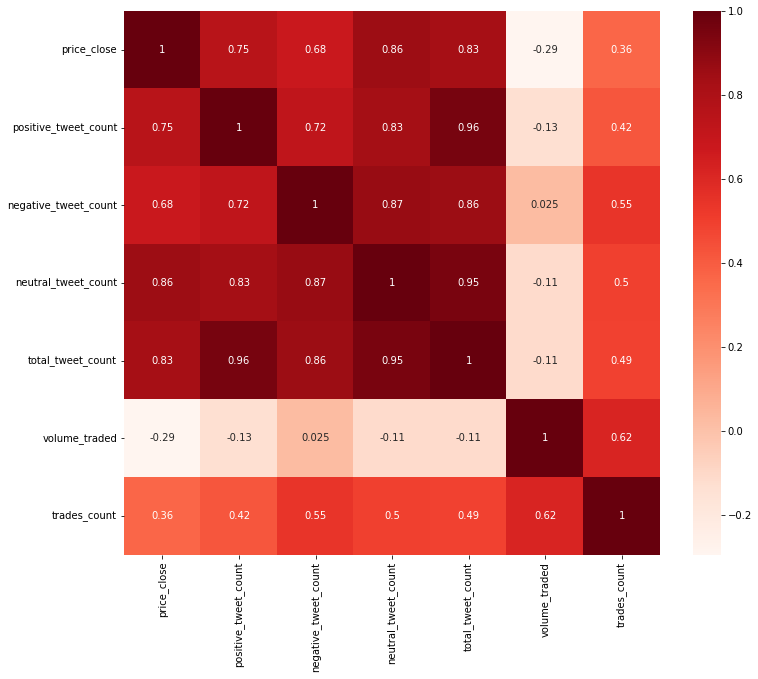

In [ ]:
df = data[["price_close", "positive_tweet_count", "negative_tweet_count", "neutral_tweet_count", "total_tweet_count", "volume_traded", "trades_count" ]]
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()